In [ ]:
pip install networkx

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 

MEMBUAT GRAPH

In [ ]:
pdEdgeList = pd.read_csv(r'/content/drive/My Drive/sna/NEW-DIKIT-pelecehan_2020-10-04_to_2020-10-12.csv')
pdEdgeList

,Source,Target,Type,Id,Label,timeset,Weight
0,27/09/2020 11:56,b'RT @jouahamnida: gue sama kakak baru aja nga...,Directed,0,NaN,NaN,1
1,27/09/2020 11:56,b'RT @jouahamnida: gue sama kakak baru aja nga...,Directed,1,NaN,NaN,1
2,27/09/2020 11:56,b'@jouahamnida jd inget dl waktu kecil ceritan...,Directed,2,NaN,NaN,1
3,27/09/2020 11:56,b'RT @jouahamnida: gue sama kakak baru aja nga...,Directed,3,NaN,NaN,1
4,27/09/2020 11:56,b'@AREAJULID kalau bahas pelecehan tu yg komen...,Directed,4,NaN,NaN,1
...,...,...,...,...,...,...,...
8569,27/09/2020 00:28,b'RT @jouahamnida: gue sama kakak baru aja nga...,Directed,9056,NaN,NaN,1
8570,27/09/2020 00:28,b'RT @jouahamnida: gue sama kakak baru aja nga...,Directed,9057,NaN,NaN,1
8571,27/09/2020 00:28,b'RT @jeno_jjang: @jouahamnida jangankan ini p...,Directed,9058,NaN,NaN,1
8572,27/09/2020 00:28,b'RT @jouahamnida: gue sama kakak baru aja nga...,Directed,9059,NaN,NaN,1


In [ ]:
gpd = nx.Graph()
for i in range(0,len(pdEdgeList)):
  gpd.add_edge(pdEdgeList['Source'].loc[i],pdEdgeList['Target'].loc[i])

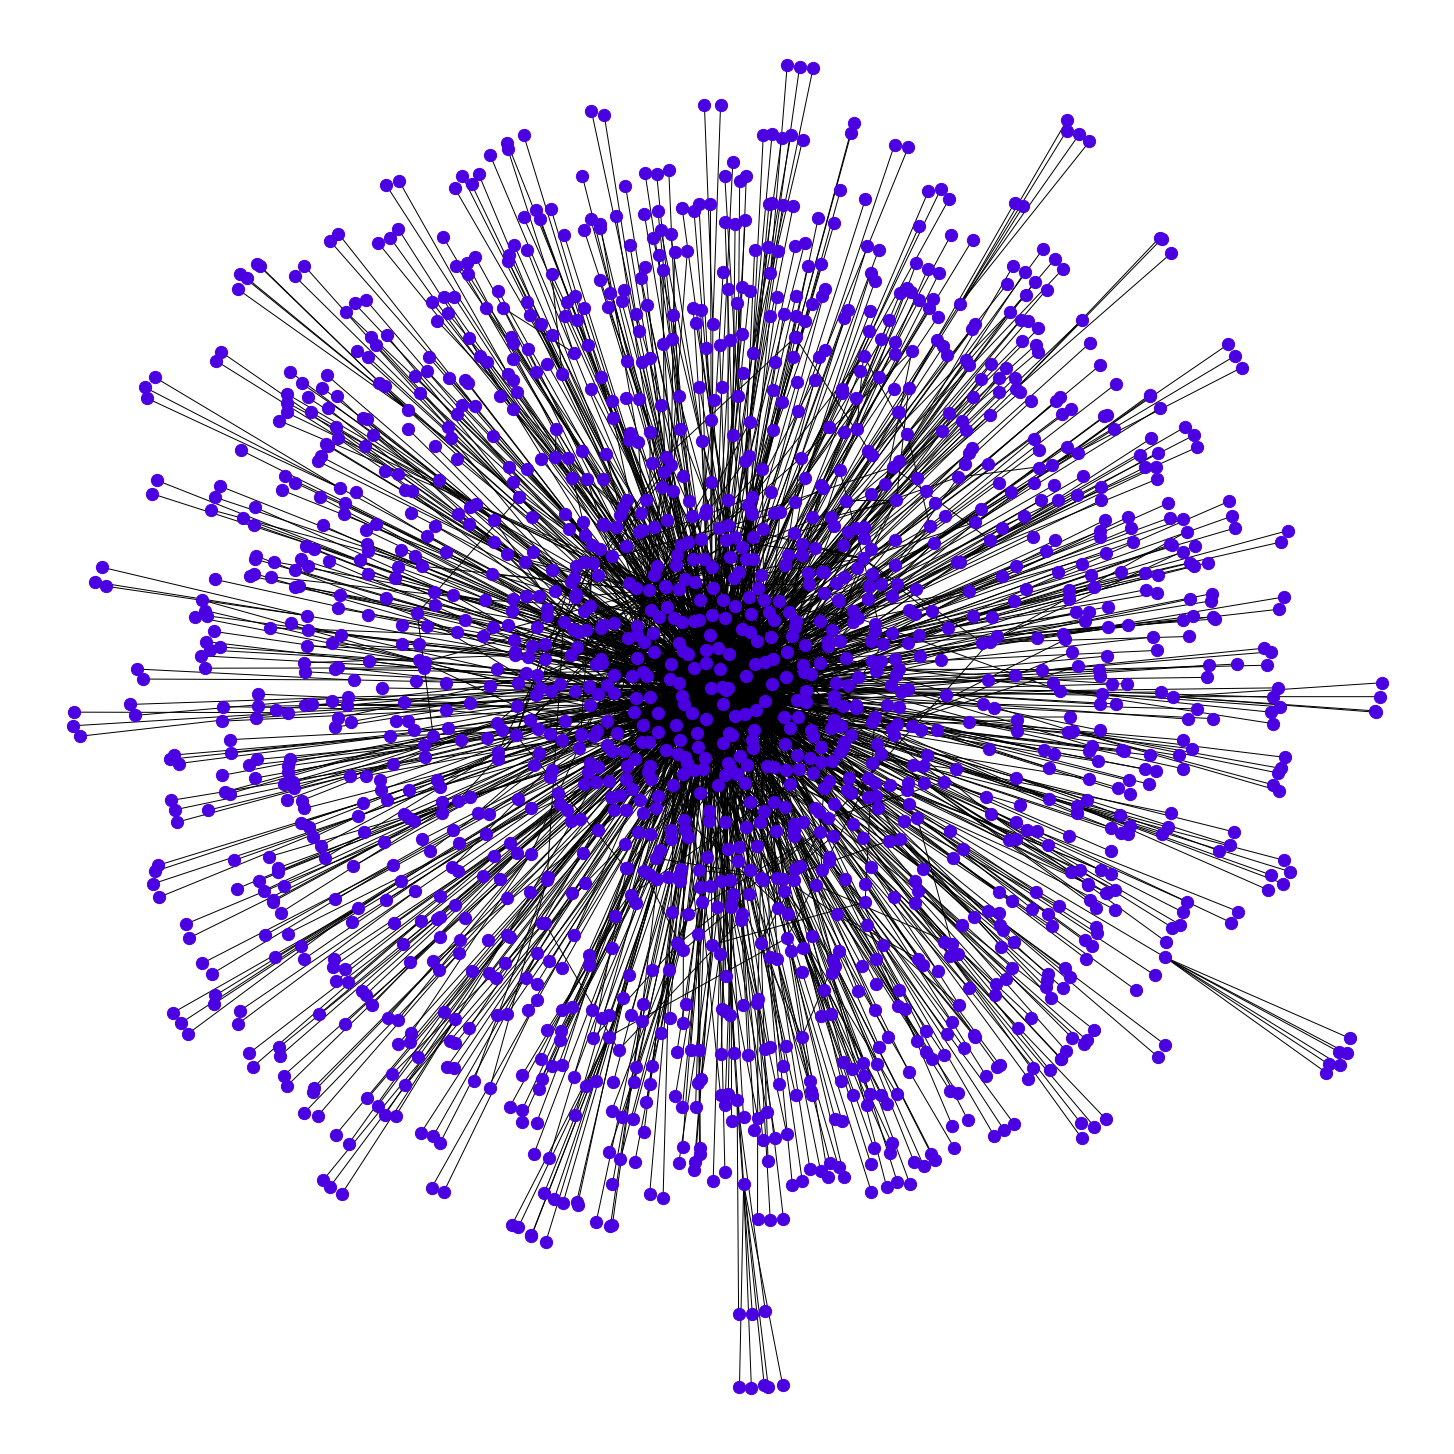

In [ ]:
fig = plt.figure(figsize=(20, 20)) 
nx.draw(gpd, node_size=150,node_color='#4A00E0') 
plt.axis('equal') 
plt.show()
# nx.draw_networkx(G_symmetric,node_size=5,font_size=2) #to visualize the network 

In [ ]:
#menambahkan edgelist ke dalam graph
for i, elrow in pdEdgeList.iterrows():
    gpd.add_edge(elrow[0], elrow[1])

In [ ]:
#function untuk menghitung degree dari graph
def calculate_degree(gpd,n = 0):
    fmdegree = []
    fmNode= []
    for node in gpd.nodes():
        tempD = gpd.degree(node)
        if tempD >= n : fmdegree.append(tempD),fmNode.append(node)
    
    return fmdegree,fmNode

In [ ]:
gpdDegree, gpdNode = calculate_degree(gpd,0)

In [ ]:
#maximun & minumum degree dari node
print('Maximum Degree of the node in this network :', max(gpdDegree))
print('Manimum Degree of the node in this network :', min(gpdDegree))

Maximum Degree of the node in this network : 689
Manimum Degree of the node in this network : 1


MENGCONVERT NODE DAN DEGREE KE DALAM DATAFRAME

In [ ]:
data = {'Node' : gpdNode,
        'Degree' : gpdDegree}
df_NodeDegree = pd.DataFrame(data)
df_NodeDegree.head()

,Node,Degree
0,27/09/2020 11:56,5
1,b'RT @jouahamnida: gue sama kakak baru aja nga...,689
2,b'@jouahamnida jd inget dl waktu kecil ceritan...,1
3,b'@AREAJULID kalau bahas pelecehan tu yg komen...,1
4,b'RT @jouahamnida: yang namanya dipegang tanpa...,262


TOP 5 PENGGUNA DENGAN DEGREE TERTINGGI

In [ ]:
df_NodeDegree.sort_values(by=['Degree'], inplace=True, ascending=False)
df_NodeDegree.head()

,Node,Degree
1,b'RT @jouahamnida: gue sama kakak baru aja nga...,689
54,b'RT @jeno_jjang: @jouahamnida jangankan ini p...,277
4,b'RT @jouahamnida: yang namanya dipegang tanpa...,262
5,b'RT @jouahamnida: jangan pernah takut buat ng...,211
53,"b'RT @EatMaduu: @jeno_jjang @jouahamnida Sama,...",111


VISUALISASI NETWORK

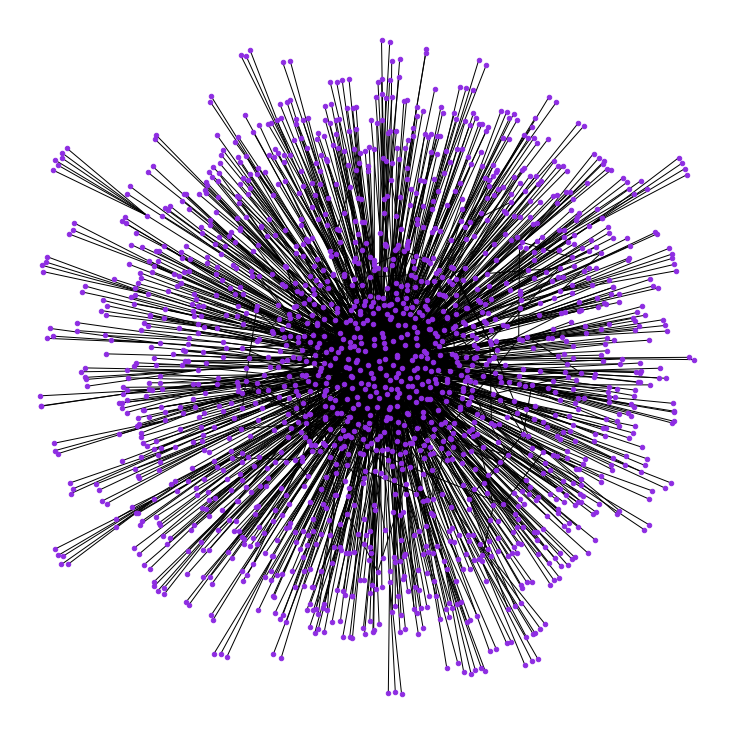

In [ ]:
fig = plt.figure(figsize=(10, 10)) 
nx.draw(gpd, node_size=20,node_color='#8E2DE2')
plt.show()

MENCARI NILAI DEGREE DARI PENGGUNA YANG PALING BERPENGARUH

In [ ]:
dc = nx.degree_centrality(gpd)
dc

{'27/09/2020 11:56': 0.002802690582959641,
 "b'RT @jouahamnida: gue sama kakak baru aja ngalamin pelecehan di jalan. abis pegang paha kakak gue orangnya lgsg ngelajuin motornya kenceng b\\xe2\\x80\\xa6'": 0.38621076233183854,
 "b'@jouahamnida jd inget dl waktu kecil ceritanya beli siomay yg keliling rumah gt eh si abang siomay berani2 nya dong\\xe2\\x80\\xa6 https://t.co/E4MXeaO1P5'": 0.0005605381165919282,
 "b'@AREAJULID kalau bahas pelecehan tu yg komen ga pernah sesuai konteks anjir'": 0.0005605381165919282,
 "b'RT @jouahamnida: yang namanya dipegang tanpa consent ya namanya pelecehan. jangan ngiranya pelecehan itu cuma grepe grepe dan pemerkosaan a\\xe2\\x80\\xa6'": 0.1468609865470852,
 "b'RT @jouahamnida: jangan pernah takut buat ngelawan pelaku pelecehan. orang2 kayak mereka makin dibiarin makin ngelunjak dan bakalan terus n\\xe2\\x80\\xa6'": 0.11827354260089686,
 '27/09/2020 11:55': 0.0033632286995515697,
 "b'Suka sedih aja setiap tahun pelecehan seksual makin hari makin meningk

In [ ]:
dc = nx.degree_centrality(gpd)
max_dc = max(list(dc.values()))
print(max_dc)

0.38621076233183854
